In [1]:
## import required libraries

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')


In [2]:
## load data
data = np.load('FaceData.npz')
Faces = data['Faces'] #238x4096
FaceImages = data['FaceImages'] #238x64x64
y = data['y'] #238x1

In [3]:
## Normalize features
FacesNorm = StandardScaler().fit_transform(Faces)

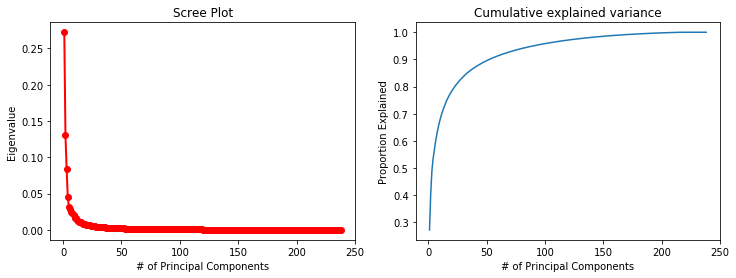

Number of Optimal PCs : 165


In [4]:
## PCA to reduce high dimensionality

# PCA with all features
GlassesPCA = PCA()
GlassesPCs = GlassesPCA.fit_transform(FacesNorm)

# Determine optimal number of components
plt.figure(figsize=[12,4])
plt.subplot(121)
plt.plot(np.arange(1,239), GlassesPCA.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('# of Principal Components')
plt.ylabel('Eigenvalue')
plt.subplot(122)
plt.plot(np.arange(1,239), np.cumsum(GlassesPCA.explained_variance_ratio_))
plt.title('Cumulative explained variance')
plt.xlabel('# of Principal Components')
plt.ylabel('Proportion Explained')
plt.show()

# Finding the number of PCs that explained 99% of variation
nIC = np.min(np.where(np.cumsum(GlassesPCA.explained_variance_ratio_)>.99))+1
print ("Number of Optimal PCs : %s" % nIC)

# Running optimal PCA
GlassesPCA = PCA(n_components=nIC)
GlassesPCs = GlassesPCA.fit_transform(FacesNorm)

In [5]:
## Classification Model 1 : Random Forest

# build base model
rf = RandomForestClassifier()
# rf.get_params().keys()

# list hyperparameters of model
param_rf = {'criterion': ['entropy','gini'], 'n_estimators': [1,5,7,10], 
            'max_depth':[4,5,6,7,8], 'min_samples_leaf': [1,2,3,4,5,6,7,8]}
            
# using a grid search to build hyper parameters to test
grid_rf = GridSearchCV(rf, param_rf, cv=10)
grid_rf.fit(GlassesPCs,y)

# Optimal set of hyperparameters and its corresponding accuracy score
print ("Optimal Parameters: %s" % grid_rf.best_params_)
print ("Model Accuracy: %s" % grid_rf.best_score_)

Optimal Parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 7, 'n_estimators': 10}
Model Accuracy: 0.7983193277310925


In [6]:
## Classification Model 2 : Logistic Regression

# build base model
logreg = LogisticRegression()

# list hyperparameters of model
param_logreg = {'C': [.001, 0.01,.1,1,10,100,1000],
               'penalty':['l2'],
               'solver':['newton-cg','lbfgs','liblinear','sag','saga']}

# using a grid search to build hyper parameters to test
grid_logreg = GridSearchCV(logreg, param_logreg, cv=10)
grid_logreg.fit(GlassesPCs,y)

# Optimal set of hyperparameters and its corresponding accuracy score
print ("Optimal Parameters: %s" % grid_logreg.best_params_)
print ("Model Accuracy: %s" % grid_logreg.best_score_)

Optimal Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Model Accuracy: 0.9873949579831933


In [7]:
## Classification Model 3 : SVM

# build base model
svm = SVC()

# list hyperparameters of model
param_svm = {'C': [.001, 0.01,.1,1,10,100,1000],
             'degree':[1,2,3,4,5,6],
         'kernel': ['linear', 'rbf', 'poly'],
            'gamma':['auto','scale'],
            'coef0':[0,1,2,3]}

# using a grid search to build hyper parameters to test
grid_svm = GridSearchCV(svm, param_svm, cv=10)
grid_svm.fit(GlassesPCs,y)

# Optimal set of hyperparameters and its corresponding accuracy score
print ("Optimal Parameters: %s" % grid_svm.best_params_)
print ("Model Accuracy: %s" % grid_svm.best_score_)

Optimal Parameters: {'C': 0.001, 'coef0': 3, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
Model Accuracy: 0.9957983193277311
